# Logistic Regression

Logistic Regression is a statistical model used for binary classification problems. It estimates the probability that an instance belongs to a particular class and is the building block of some neural nets.

**Typical Use Cases:**
- Predicting whether an email is spam or not.
- Classifying customer churn (churn vs. stay).
- Medical diagnosis (disease vs. no disease).


## Pros, Cons, and When to Use

**Pros:**
- Easy to implement and interpret.
- Fast to train.
- Works well for linearly separable classes.

**Cons:**
- Assumes linearity between independent variables and log-odds.
- Struggles with multicollinearity.
- Can underperform with highly complex or non-linear data.

**When to Use:**
- When you need a baseline binary classifier.
- When interpretability matters.
- When the relationship between features and the target is approximately linear.

In [1]:
# For visualisations
from Visualisations import *


## Motivation

Consider the linear regression model  

$$ Y = x^{\top}\beta + \epsilon$$

where the expected value of $Y$ given $x$ written as $E[Y|x]$ is equal to $x^{\top}\beta$.

This makes sense for numerical values but what about categorical?

---


## Encoding Categories
Assume the output $Y$ has only two categories i.e True/False, Red/Blue, Heads/Tails, etc. 

$Y \in \{c_0, c_1\}$

We can encode these categories in $c_0 := 0$ and $c_1 := 1$ so that $Y \in \{0, 1\}$

$$E[Y | x] = 0 \cdot P(Y = 0 | x) + 1 \cdot P(Y = 1 | x) = P(Y = 1 |x) \overset{\text{denote}}{=} \pi$$  

So for a given value $x \in \mathbb{R}^{p}$ we would like to predict if $Y$ will take the value $0$ or $1$ (i.e. $c_0, c_1$). In other words we would like to **classify** the prediction.  

For a given $x \in \mathbb{R}^{p}$, if we estimate $\pi = E[Y|x] = P(Y - 1|x)$ to be high then our prediction $\hat{y} = 1$ otherwise $\hat{y} = 0$.  

So how do we estimate $\pi = E[Y|x] = P(Y = 1|x)$?

---

## Sigmoid Function

The natural log to the rescue!

Note that if we take the natural log of the **odds ratio** of $\pi$ and regress on $x$ we get  

$$\ln \dfrac{\pi}{1 - \pi} = x^{\top}\beta$$  

Solving for $\pi$ gives 

$$P(y = 1|x) = \pi = \dfrac{e^{x^{\top} \beta}}{1 + e^{x^{\top}\beta}} = \dfrac{1}{1 + e^{-x^{\top}\beta}}$$

The function $F(z) = \dfrac{e^{z}}{1 + e^{z}} = \dfrac{1}{1 + e^{-z}}$ is called the **sigmoid** function denoted by $\sigma (z)$  

The function $\pi \mapsto \ln \dfrac{\pi}{1 - \pi}$ is called **logit** or the logistic unit function.

Classifying a binary output $Y$ using the model $P(Y = 1|x) = \pi = \dfrac{e^{x^{\top} \beta}}{1 + e^{x^{\top}\beta}}$ is called **Logistic Regression**.  

---

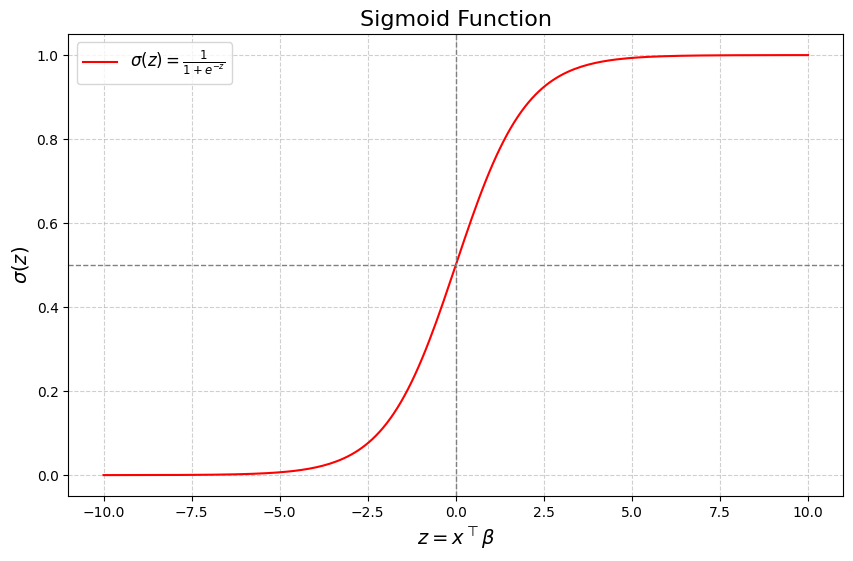

In [2]:
# Graph of sigmoid function
sigmoid_plot()

## Parameter Estimation

We want to estimate ${\pi}$ 

$$\hat{\pi} = \dfrac{e^{x^{\top} \hat{\beta}}}{1 + e^{x^{\top}\hat{\beta}}}$$  

but how do we estimate the parameter vector $\hat{\beta}$?

We use the maximum likelihood estimate which minimises the log-likelihood function so $\hat{\beta} = \hat{\beta}_{MLE}$


$\pi = P(Y = 1 |x, \beta) = F(x^{\top}\beta) = \dfrac{e^{x^{\top} \beta}}{1 + e^{x^{\top}\beta}}$

$$
P(Y = y \mid x, \beta) =
\begin{cases}
\pi & \text{,} y = 1 \\
1 - \pi & \text{,} y = 0
\end{cases} = \pi^{y} (1 - \pi)^{1-y} = F(x^{\top} \beta)^{y} (1 - F(x^{\top} \beta))^{1 - y}
$$

Recalling the regressor matrix $X = \begin{bmatrix} X_{1\rightarrow} \\ \vdots \\ X_{i\rightarrow} \\ \vdots \\ X_{n\rightarrow} \end{bmatrix} = \begin{bmatrix} x_{1}^{\top} \\ \vdots \\ x_{i}^{\top}  \\ \vdots \\ x_{n}^{\top}  \end{bmatrix}$ where $x_{i}^{\top} = [1, x_{i2}, x_{i3}, \dots, x_{ip}]$ are the values of all predictors in the *i*-th observation.  

The logistic regression model uses the **sigmoid function** to map predicted values to probabilities

---

## Log Likelihood

The likelihood function becomes

$$
L(\beta) = \prod_{i=1}^{n} \left[ F(X_i^T \beta) \right]^{y_i} \left[ 1 - F(X_i^T \beta) \right]^{1 - y_i}
$$

Where:

$$
p_{i} = F(X_i^T \beta) = \frac{1}{1 + e^{-X_i^T \beta}}
$$

$p_{i}$ is the predicted probability of the *i*-th observation belonging to the positive class  

Using the logarithmic properties  

$$\ln(ab) = \ln(a) + \ln(b)$$  

and 

$$\ln(a^{b}) = b \ln(a)$$ 

We can rewrite the likelihood function as the **log-likelihood function**


$$
\ln L(\beta) = \sum_{i=1}^{n} \left[ y_i \ln F(X_i^T \beta) + (1 - y_i) \ln (1 - F(X_i^T \beta)) \right] = \sum_{i=1}^{n} \left[ y_i \ln p_i + (1 - y_i) \ln (1 - p_i)) \right]
$$


The goal is to find the parameters $\beta$ that maximise this log-likelihood.

---

For the logistic setting the loss function is:

$$
\ell(\beta) = -\ln L(\beta)
$$

Maximum likelihood estimator (MLE):

$$
\hat{\beta}_{MLE} = \arg \max_{\beta} L(\beta)
= \arg \max_{\beta} \ln L(\beta)
= \arg \min_{\beta} \left(-\ln L(\beta)\right)
= \arg \min_{\beta} \ell(\beta)
$$

**Convexity and Global Minimum**  

It can be shown that the loss function $ \ell(\beta) = -\ln L(\beta)$ is a **convex function** in $\beta$, since $\ln L(\beta)$ is concave.  

This convexity guarantees a **unique global minimum** for the optimization problem.  

---


## Logistic Regression Loss Function and Gradient

The **negative log-likelihood (loss function)** for logistic regression is:

$$
\ell(\beta) = - \sum_{i=1}^{n} \left[ y_i \ln p_i + (1 - y_i) \ln (1 - p_i) \right]
$$

Where:

- $n$ = number of observations  
- $p_i$ = predicted probability for observation $i$  
- $y_i$ = actual binary outcome (0 or 1) for observation $i$  
- $p_i = F(X_i^T \beta) = \frac{1}{1 + e^{-X_i^T \beta}}$

---

## Gradient of the Loss Function

Taking the derivative with respect to $\beta$ gives the gradient:

$$
\nabla_\beta \ell(\beta) = \sum_{i=1}^{n} (p_i - y_i) X_i
$$

Or more compactly in matrix notation:

$$
\nabla_\beta \ell(\beta) = X^T (p - y)
$$

---

## Notation:

- $X$ is an $n \times k$ matrix:  
  - $n$ = number of observations (rows)  
  - $k$ = number of predictors (columns, including an intercept if applicable)
- $p$ is an $n \times 1$ vector of predicted probabilities  
- $y$ is an $n \times 1$ vector of actual labels (0 or 1)

---

## Why It Matters:

- The gradient $\nabla_\beta \ell(\beta)$ shows how to adjust the model parameters $\beta$ to reduce the loss.
- It's used in optimization algorithms like:
  - **Gradient Descent**:
    $$
    \beta^{(t+1)} = \beta^{(t)} - \alpha \nabla_\beta \ell(\beta^{(t)})
    $$
  - **Newton-Raphson (or Iteratively Reweighted Least Squares for logistic regression)** — a second-order method using the Hessian for faster convergence.
- Minimizing this loss function finds the **maximum likelihood estimate (MLE)** of $\beta$.

---


## Hessian of the Loss Function

The **Hessian matrix** is the matrix of second derivatives of the loss function with respect to the parameters $\beta$.

For logistic regression, the Hessian is:

$$
H(\beta) = X^T W X
$$

Where:

- $W$ is an $n \times n$ diagonal matrix with entries:
  $$
  w_i = p_i (1 - p_i)
  $$

---

## Newton-Raphson (Iteratively Reweighted Least Squares) Update

Using both the gradient and the Hessian, the **Newton-Raphson update step** for $\beta$ is:

$$
\beta^{(t+1)} = \beta^{(t)} - H^{-1}(\beta^{(t)}) \nabla_\beta \ell(\beta^{(t)})
$$

In matrix form:

$$
\beta^{(t+1)} = \beta^{(t)} + (X^T W X)^{-1} X^T (y - p)
$$

---

## Why This Matters:

- The Hessian captures the **curvature** of the loss function.  
- Using it with the Newton-Raphson method allows for **faster, quadratic convergence** compared to first-order methods like gradient descent.  
- Especially useful in logistic regression where the log-likelihood is concave and has a unique maximum.  

Newton-Raphson is the basis for many statistical modeling tools (like `statsmodels`' `Logit` or `GLM` in Python) that solve logistic regression models via maximum likelihood.

---


## Summary

The logistic regression model uses the **sigmoid function** to map predicted values to probabilities:

$$
P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n)}}
$$

Where:
- $ \beta_0 $ is the intercept.
- $ \beta_i $ are the model coefficients.
- $ X_i $ are the feature values.

The loss function used is the **log loss** (binary cross-entropy):

$$
L = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1-y_i) \log(1-p_i) \right]
$$


## Data Preprocessing

**When to use Standardization or Normalization:**

- Logistic Regression is sensitive to the scale of features.
- Use **Standardization** (zero mean, unit variance) if features have different units or scales.


## Predicting Breast Cancer Example

**Background**

The data was collected to identify whether a tumor biopsy was malignant or benign. A malignant tumor requires medical intervention.  

**Variables**
Ten real-valued features are computed for each cell nucleus:

a) radius8 (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

k) **Diagnosis** (M = malignant, B = benign)

In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load breast cancer data
data = load_breast_cancer()

# Create data frame of predictive features
X = pd.DataFrame(data.data, columns=data.feature_names)

# Create series (one-dimensional array) for the target data we are trying to predict
y = pd.Series(data.target)

In [4]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# In this step we check how many malignant and benign diagnoses are in the target variable, malignant is coded as "1", benign is coded as "0"

diagnosis_categories  = list(y.value_counts())
print('This data has {} malignant and {} benign diagnoses.'.format(diagnosis_categories[1],diagnosis_categories[0]))

This data has 212 malignant and 357 benign diagnoses.


## Split the data into training and test sets

Important to split the data prior to standardizing it as it prevents 'data leakage' or information learned during scaling the whole data set from being indirectly introduced to the model.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Scale the data

There are 30 different feature columns with different units of measurement so lets standardize them.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Compute scaling parameters (mean and standard deviation) and apply them to the training samples
X_train_scaled = scaler.fit_transform(X_train)

# Then transform test data using the scaler fitted on training data
X_test_scaled = scaler.transform(X_test)

## Fit The Model on Training Data

In [9]:
from sklearn.linear_model import LogisticRegression

# Define the model and parameters used
model = LogisticRegression(max_iter= 5000, random_state= 42)


# Fit the model on the training data
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=5000, random_state=42)

## Predict Test Data Using the Training Model

In [10]:
y_pred = model.predict(X_test_scaled)

y_prob = model.predict_proba(X_test_scaled)[:, 1]

## Evaluation Metrics


**Accuracy**: Proportion of the data correctly predicted  

$$\text{Accurary} = \dfrac{TP + TN}{TP + TN + FP + FN}$$

**Precision**: Positive Predictive Value (PPV)  

$$PPV = \dfrac{TP}{TP + FP}$$

**Sensitivity or Recall**: The True Positive Rate (TPR)

$$TPR = \dfrac{TP}{P} = \dfrac{TP}{TP + FN} = 1 - FNR$$

**F1 Score**: Provides a balance between precision and recall

$$\text{F1 Score} = 2 * \dfrac{\text{(Precision * Recall)}}{\text{(Precision + Recall)}}$$
 
**ROC-AUC**: Receiver Operator Characteristics - Area Under the Curve  

ROC plots the true positive rate (TPR) vs. the false positive rate (FPR) = 1 - Specificity  

Area Under the Curve is simply the area under the curve generated by plotting the ROC

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))


Accuracy: 0.9824561403508771
Precision: 0.9906542056074766
Recall: 0.9814814814814815
F1 Score: 0.986046511627907
ROC-AUC: 0.9979423868312757

Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.98      0.98        63
      benign       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



## Visualise classification performance on out of sample test data

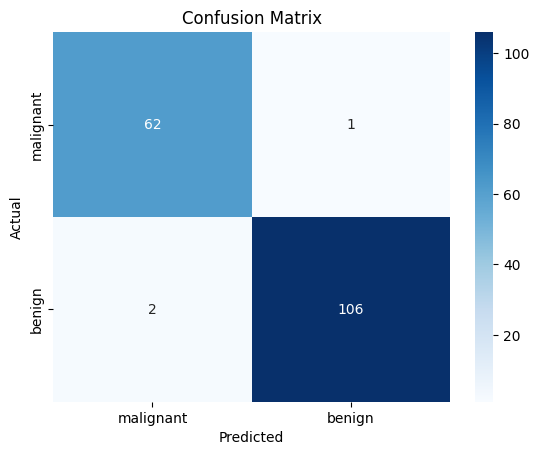

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, roc_curve

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


ROC AUC Score: 0.9979423868312757


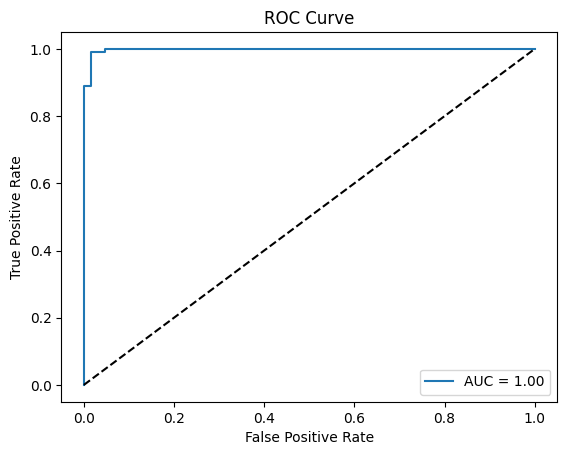


Logistic Regression Coefficients (sorted by impact):
fractal dimension error    0.694861
mean compactness           0.622023
compactness error          0.600753
symmetry error             0.505452
mean symmetry              0.221625
texture error              0.154407
mean fractal dimension     0.139476
worst compactness          0.118408
concavity error           -0.083213
worst fractal dimension   -0.103243
smoothness error          -0.177194
mean smoothness           -0.192204
mean perimeter            -0.320483
mean texture              -0.361581
mean radius               -0.366191
mean area                 -0.417178
concave points error      -0.469397
worst smoothness          -0.496351
worst perimeter           -0.537369
perimeter error           -0.611111
mean concavity            -0.747674
worst area                -0.774047
worst concave points      -0.808050
worst radius              -0.814530
area error                -0.868623
worst concavity           -0.974874
mean conca

In [13]:

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 🔍 Check feature coefficients
coefficients = pd.Series(model.coef_[0], index=X.columns)
print("\nLogistic Regression Coefficients (sorted by impact):")
print(coefficients.sort_values(ascending=False))

## Cross-Validation

Use k-Fold Cross-Validation to validate model performance.


Use StratifiedKFold for balanced class splits in each fold
This is crucial for imbalanced data — and breast cancer is slightly imbalanced (around 62% benign / 38% malignant)

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# No split needed for CV itself unless you're holding out a final test set

In [16]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

In [17]:
# 5-fold cross-validation with accuracy as scoring metric
scores = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')

print("Accuracy scores on each fold:", scores)
print("Mean accuracy: {:.3f}".format(scores.mean()))


Accuracy scores on each fold: [0.98245614 0.98245614 0.97368421 0.97368421 0.99115044]
Mean accuracy: 0.981


In [18]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(pipe, X, y, cv=5, scoring=['accuracy', 'roc_auc'])

print("Mean Accuracy:", np.mean(cv_results['test_accuracy']))
print("Mean ROC AUC:", np.mean(cv_results['test_roc_auc']))


Mean Accuracy: 0.9806862288464524
Mean ROC AUC: 0.9951873601644319


In [19]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(pipe, X, y, cv=cv, scoring='accuracy')
print("StratifiedKFold CV accuracy:", scores.mean())


StratifiedKFold CV accuracy: 0.9736686849868033


## Hyperparameter Tuning

Key hyperparameters:
- `C`: Regularization strength (inverse of $ \lambda $).
- `penalty`: Regularization type (`l1`, `l2`, `elasticnet`).
- `solver`: Optimization algorithm.

Use `GridSearchCV` to find the best combination.

## References


- Prof. Rob McCulloch’s lecture notes (http://www.rob-mcculloch.org/)
- An Introduction to Statistical Learning with Applications in R (ISLR); by James, Witten, Hastie, Tibshirani
- "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" by Aurélien Géron
- [scikit-learn LogisticRegression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)